## Unsupervised Learning Challenge
### Ramya Nivedha Raja 

### Part 1: Prepare the Data

In [1]:
#import all nesecary dependencies
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# store data from myopia.csv into dataframe, and then test to see if it properly stored the information
myopia_data = pd.read_csv("Starter_Code/myopia.csv")
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# remove mypoic column from data
data = myopia_data.drop(["MYOPIC"], axis = 1)
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#standardize dataset so columns with larger values don't influence outcome
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### Part 2: Apply Dimensionality Reduction

In [6]:
#perform dimensionality reduction with PCA (principal component analysis)
pca = PCA(n_components=.9)
pca_data = pca.fit_transform(scaled_data)

In [23]:
#need to know for later when doing k-means
len(pca.components_)

10

In [7]:
# t-SNE (t-distributed Stochastic Neighbor Embedding, helps see how the data is arranged)
tsne = TSNE(learning_rate=35)
tsne_data = tsne.fit_transform(pca_data)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
#check dimension reduction actually occurred
tsne_data.shape

(618, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

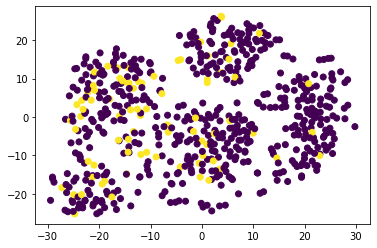

In [12]:
#assign tsne data to variables to plot for visualization
data["x"] = tsne_data[:,0]
data["y"] = tsne_data[:, 1]
data["MYOPIC"] = myopia_data["MYOPIC"]
plt.scatter(data["x"],data["y"], c=data["MYOPIC"])
plt.show

### Part 3: Perform a Cluster Analysis with K-means

In [16]:
#Create an elbow plot to figure out what is the optimal number of clusters for K-Means
#Use for loop to determine the inertia for each k between 1 through 10
inert = []
k = list(range(1,11))
#for loop to calculate inertia
for i in k: 
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_data)
    inert.append(km.inertia_)
#calculating data to plot elbow curve
elbow = {"k": k, "inertia": inert}
elbow_df = pd.DataFrame(elbow)
elbow_df

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


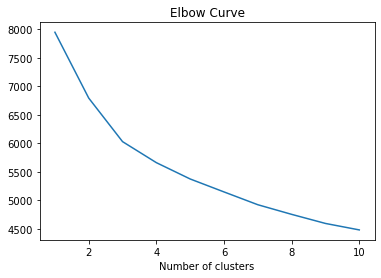

In [21]:
#plot elbow curve
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xlabel('Number of clusters')
plt.title('Elbow Curve')
plt.show()

Based on this elbow curve, we can estimate we will need approximately 3 clusters in our K-Means clustering algorithm

In [32]:
#Data from PCA needs to be put into a dataframe for K-Means clustering
cols = []
for i in range(10):
    cols.append(i+1)
#creating dataframe
k_means_data = pd.DataFrame(pca_data, columns = cols)
k_means_data["myopia"] = km.labels_


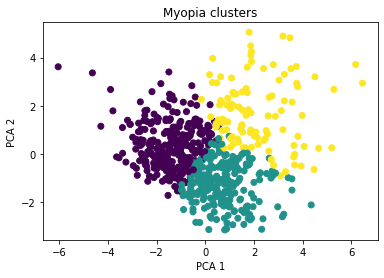

In [34]:
#K-Means Clustering
k_means_model = KMeans(n_clusters=3, random_state=0)
#fit the model according to PCA data
k_means_model.fit(pca_data)
#predict clusters
preds = k_means_model.predict(pca_data)
# add preds to dataframe
k_means_data["myopia"] = k_means_model.labels_
#Clustering visualization
plt.scatter(x=k_means_data[1], y=k_means_data[2], c=k_means_data['myopia'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

### Part 4: Make a Reccommendation

The myopia data was prepared and reduced using PCA and t-SNE, and then subjected to K-Means cluster analysis. The analysis indicates that the ideal number of clusters is 3, but t-SNE was ineffective due to random noise. Although some patterns were noticed, the dataset is insufficient for precise predictions or further training. To enhance clustering accuracy and try other models, it is recommended to collect a larger dataset and divide it into test and training sets.